In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_table(f'data/src/{2013}/part-00000', index_col=False, header=None,
              names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation',
                     'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age',
                     'bikeid'], sep=',')

for i in range(2014, 2020):
    df2 = pd.read_table(f'data/src/{i}/part-00000', index_col=False, header=None,
              names=['id', 'biketype', 'starttime', 'endtime', 'startstation', 'endstation',
                     'startlat', 'startlng', 'endlat', 'endlng', 'member_casual', 'gender', 'age',
                     'bikeid'], sep=',')
    df = pd.concat([df, df2])

In [3]:
df

,id,biketype,starttime,endtime,startstation,endstation,startlat,startlng,endlat,endlng,member_casual,gender,age,bikeid
0,126212,NaN,2013-07-29T19:03:00,2013-07-29T19:21:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,847
1,153535,NaN,2013-08-04T00:22:00,2013-08-04T00:46:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Customer,NaN,NaN,513
2,74162,NaN,2013-07-17T23:45:00,2013-07-18T00:09:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,25.0,505
3,572092,NaN,2013-09-23T19:58:00,2013-09-23T20:24:00,Sheffield Ave & Fullerton Ave,Aberdeen St & Madison St,Chicago,41.925602,NaN,NaN,Subscriber,Male,38.0,2407
4,71712,NaN,2013-07-17T09:53:00,2013-07-17T10:18:00,State St & 16th St,Aberdeen St & Madison St,NaN,NaN,NaN,NaN,Customer,NaN,NaN,587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522053,22344864,NaN,2019-04-17T15:16:28,2019-04-17T15:24:40,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,62.0,2831
4522054,22531855,NaN,2019-05-04T18:31:46,2019-05-04T18:37:32,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,32.0,5506
4522055,23010614,NaN,2019-06-05T21:34:32,2019-06-06T20:57:12,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Customer,Female,43.0,4391
4522056,23423527,NaN,2019-06-28T10:33:17,2019-06-28T10:39:47,Halsted St & 69th St,Perry Ave & 69th St,Chicago,41.769062,Chicago,41.769293,Subscriber,Male,32.0,6317


In [4]:
age_payment = df[['age', 'member_casual']]
age_payment = age_payment.dropna()
age_payment

,age,member_casual
2,25.0,Subscriber
3,38.0,Subscriber
6,37.0,Subscriber
7,52.0,Subscriber
8,41.0,Subscriber
...,...,...
4522053,62.0,Subscriber
4522054,32.0,Subscriber
4522055,43.0,Customer
4522056,32.0,Subscriber


In [9]:
age_payment_cust = age_payment[age_payment['member_casual'] == 'Customer']
age_payment_sub = age_payment[age_payment['member_casual'] == 'Subscriber']

age_bins_sub = pd.cut(age_payment_sub['age'],
                    [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_payment_sub['age'].max()],
                    include_lowest=True)
age_bins_cust = pd.cut(age_payment_cust['age'],
                    [0, 15, 18, 21, 24, 27, 30, 35, 40, 45, 50, 55, 60, 70, 90, age_payment_cust['age'].max()],
                    include_lowest=True)
age_payment_sub['age_bins'] = age_bins_sub
age_payment_cust['age_bins'] = age_bins_cust

/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_14863/2241500041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_payment_sub['age_bins'] = age_bins_sub
/var/folders/hl/t6sk4wm51pl391hqq4jv44hm0000gp/T/ipykernel_14863/2241500041.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_payment_cust['age_bins'] = age_bins_cust


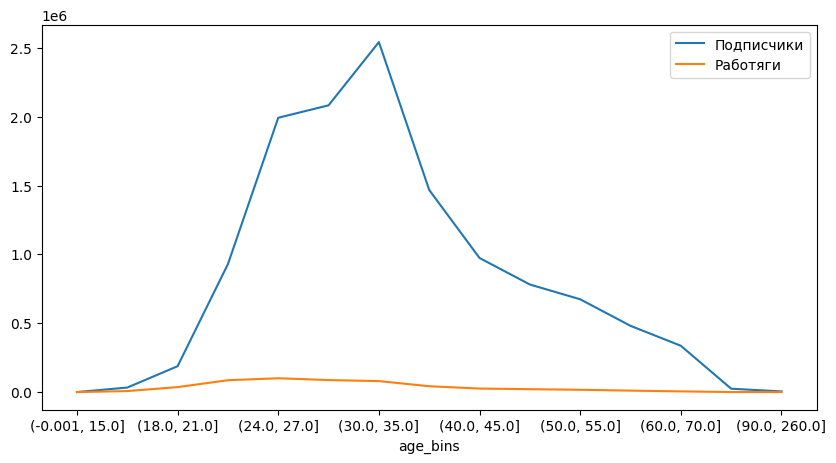

In [10]:
age_payment_sub = age_payment_sub.groupby('age_bins')['member_casual'].count()
age_payment_cust = age_payment_cust.groupby('age_bins')['member_casual'].count()

plt.figure(figsize=(10, 5))
age_payment_sub.plot()
age_payment_cust.plot()
plt.legend(['Подписчики', 'Работяги'])
plt.show()

### График кол-ва поездок по возрасту в зависимости от типа оплаты

Видим тенденцию, что подавляющее большинство платит по подписке. Не значит ли это, что она существует в убыток?
